the code includes:

reading the data

Visualize the distribution of planet and star variables

create Habitable Zone Exploration

Display the number of habitable planets

Correlation Analysis

Visualize the correlation matrix

Outlier Detection

Visualize more details for  'star_luminosity'  as histogram

Linear Regression

Logistic Regression for Classification

StandardScaler for feature scaling

Addressing Class Imbalance

Evaluate the model performance on resampled data

In [ ]:
import pandas as pd

data = pd.read_csv('/content/exoplanets.csv')
print(data.head())

   planet_mass  planet_radius  orbital_period  orbital_radius  star_mass  \
0     8.590134        1.94544        0.736548        0.015439      1.015   
1     4.512760        1.57920        3.537960        0.043600      0.910   
2    36.864800        5.11952        8.463035        0.083050      0.500   
3    32.097800        3.13600       18.859014        0.141700      0.500   
4   146.188000       11.53600        3.487800        0.046000      0.990   

   star_radius  star_luminosity  
0         0.98         3.310754  
1         1.00         2.582873  
2         0.75         1.508021  
3         0.75         1.339036  
4         1.71         2.893016  


In [ ]:
print(data.describe())

        planet_mass  planet_radius  orbital_period  orbital_radius  \
count   1013.000000    1013.000000     1013.000000     1013.000000   
mean     343.563980       9.033790       18.851294        0.101647   
std      811.766416       5.612988       65.343955        0.162509   
min        0.889840       0.884800        0.719573        0.015260   
25%       10.900540       2.817920        3.118601        0.041010   
50%      133.476000      10.673600        4.542169        0.054900   
75%      349.580000      13.596800       11.024540        0.096000   
max    11440.800000      20.888000     1071.232280        1.890000   

         star_mass  star_radius  star_luminosity  
count  1013.000000  1013.000000      1013.000000  
mean      0.992595     1.125280         3.206746  
std       0.265571     0.497601         1.113675  
min       0.330000     0.328000         1.020237  
25%       0.830000     0.794000         2.434663  
50%       1.000000     1.038000         3.145093  
75%       1.

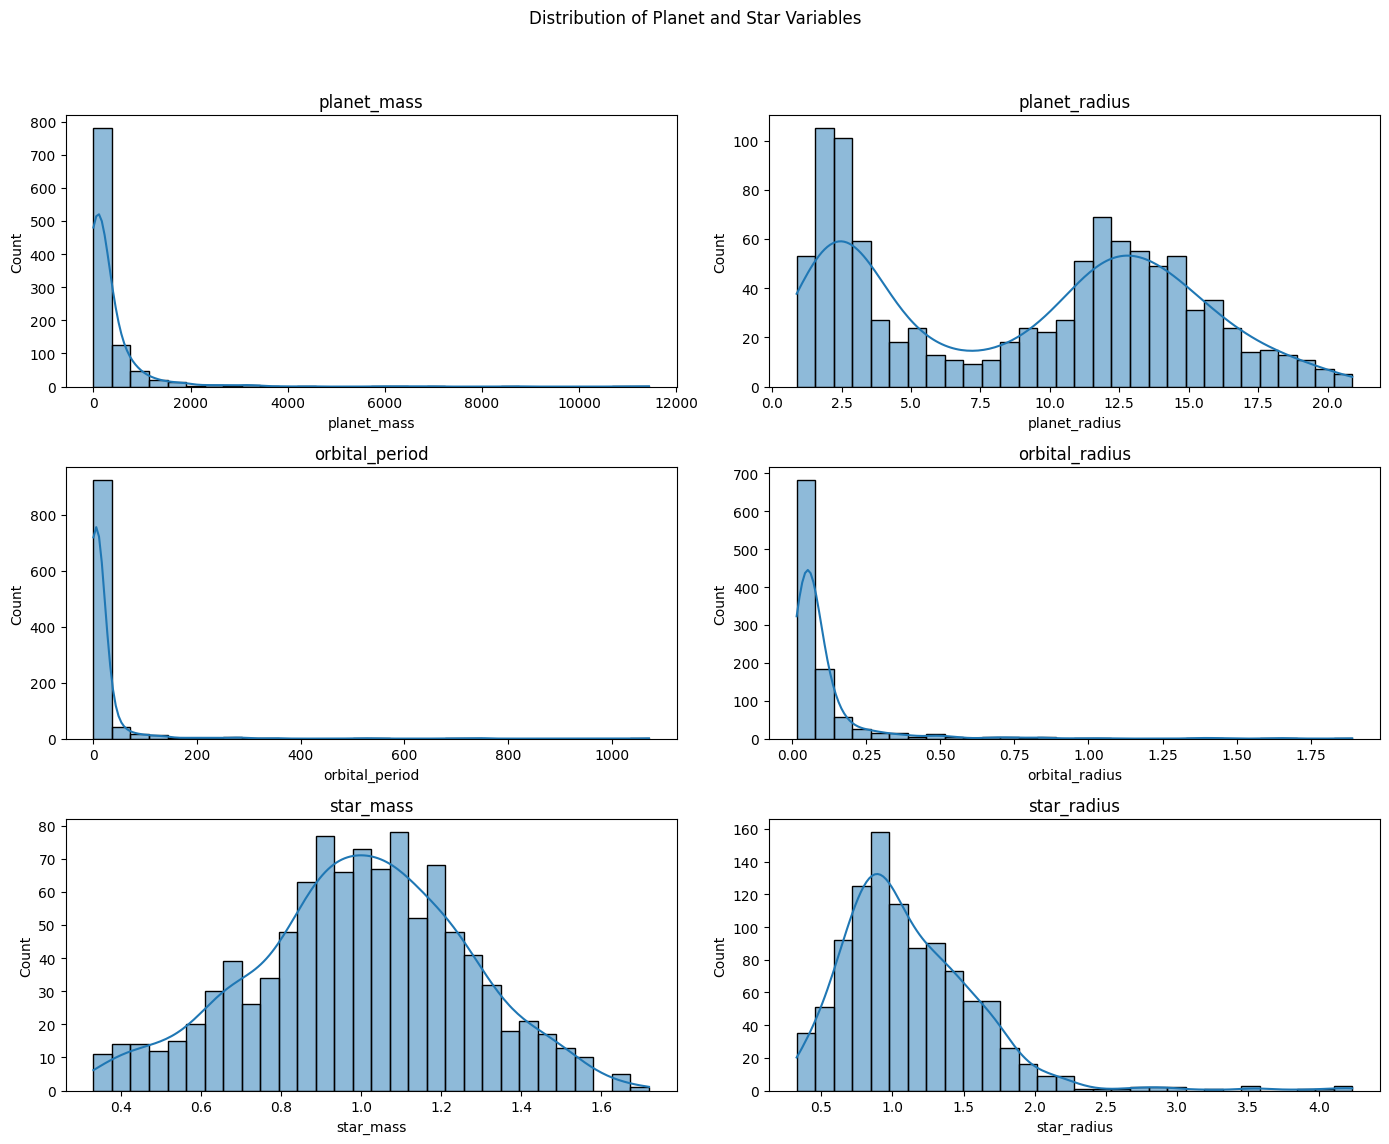

Number of habitable planets: 2


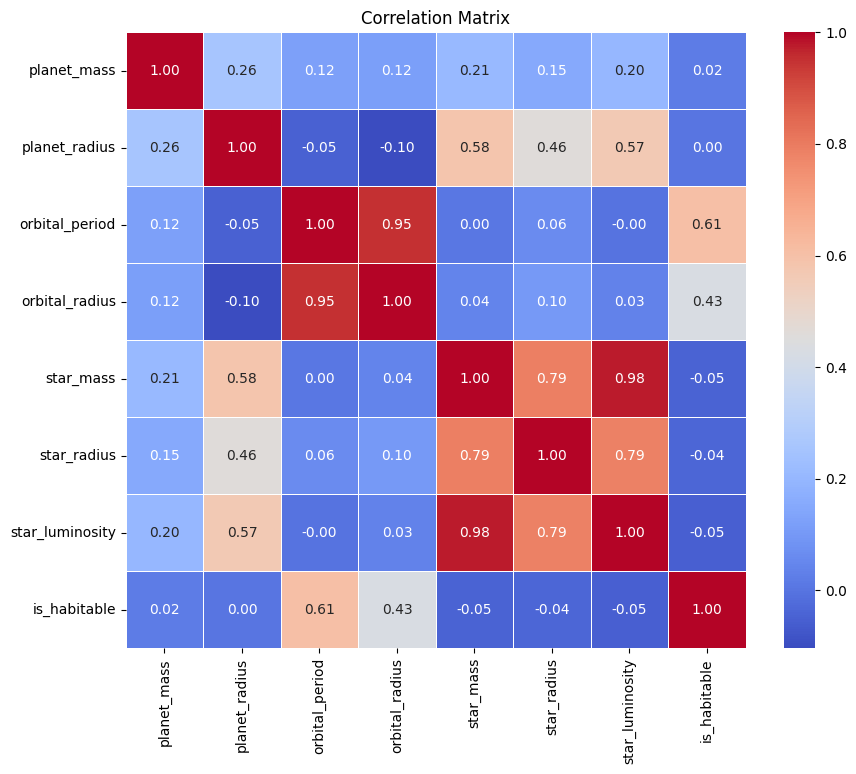

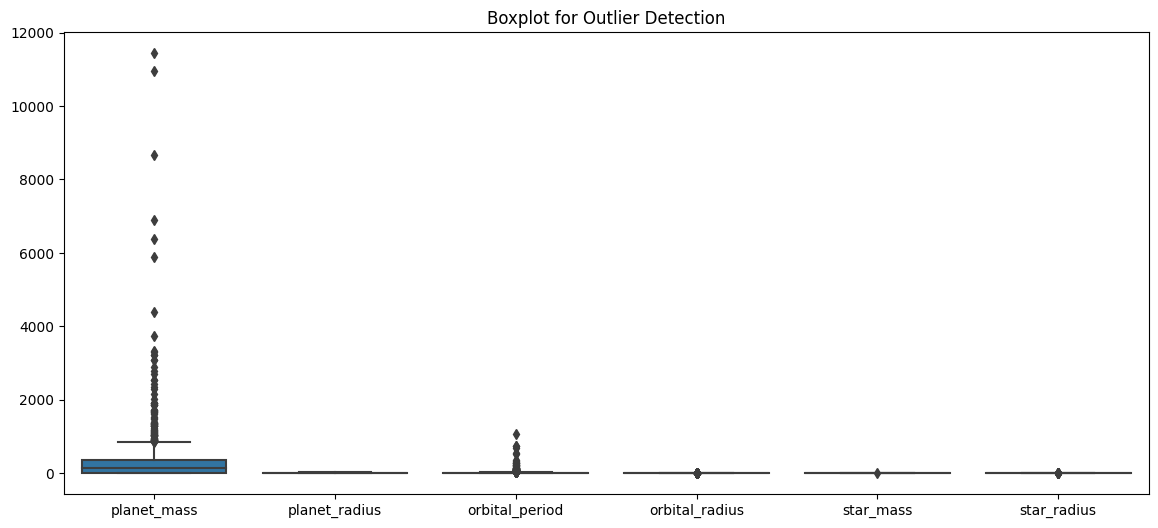

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,12))
fig.suptitle('Distribution of Planet and Star Variables')

for i, col in enumerate(['planet_mass','planet_radius','orbital_period','orbital_radius','star_mass','star_radius']):
    sns.histplot(data[col], ax=axes[i//2,i%2], kde=True, bins=30)
    axes[i//2,i%2].set_title(col)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

data['is_habitable'] = data.apply(lambda row: 0.8 * row['star_luminosity'] <= row['orbital_radius'] <= 2 * row['star_luminosity'], axis=1)
habitable_planets = data[data['is_habitable']]

print(f"Number of habitable planets: {habitable_planets.shape[0]}")

correlation_matrix = data.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(data=data[['planet_mass','planet_radius', 'orbital_period', 'orbital_radius', 'star_mass', 'star_radius']])
plt.title('Boxplot for Outlier Detection')
plt.show()




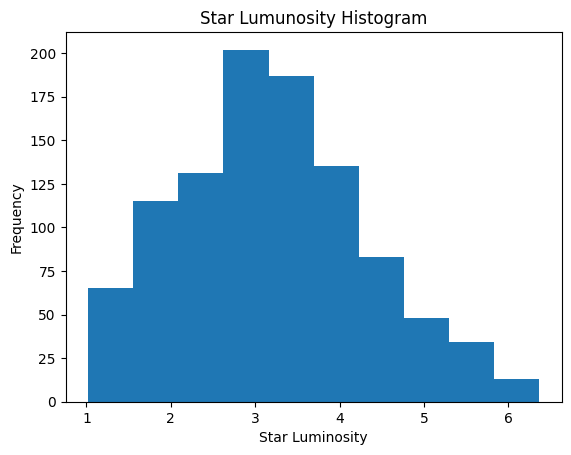

In [ ]:
plt.hist(data['star_luminosity'])
plt.title('Star Lumunosity Histogram')
plt.xlabel('Star Luminosity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
for col in ['star_luminosity', 'orbital_period']:
    print(data[col].value_counts())


3.310754    1
1.555875    1
1.234839    1
1.367283    1
3.119014    1
           ..
2.582160    1
3.981706    1
4.101904    1
2.828550    1
5.308418    1
Name: star_luminosity, Length: 1013, dtype: int64
0.736548     1
3.134279     1
2.527093     1
18.088160    1
20.772907    1
            ..
13.156969    1
9.211650     1
48.366850    1
2.225177     1
2.864133     1
Name: orbital_period, Length: 1013, dtype: int64


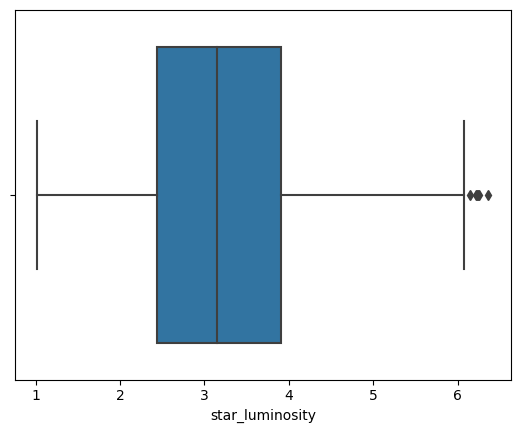

In [ ]:
sns.boxplot(x=data['star_luminosity'])
plt.show()

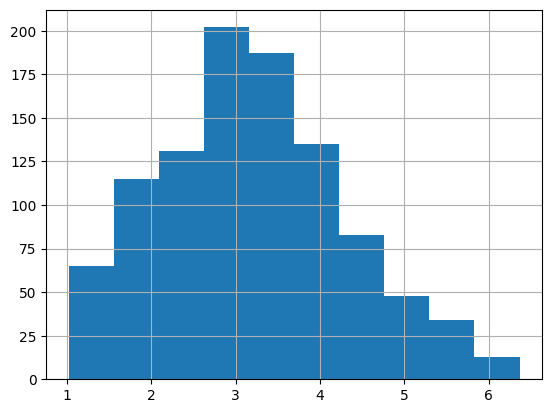

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['star_luminosity'].hist()
plt.show()

Mean Squared Error: 0.04419044881985511


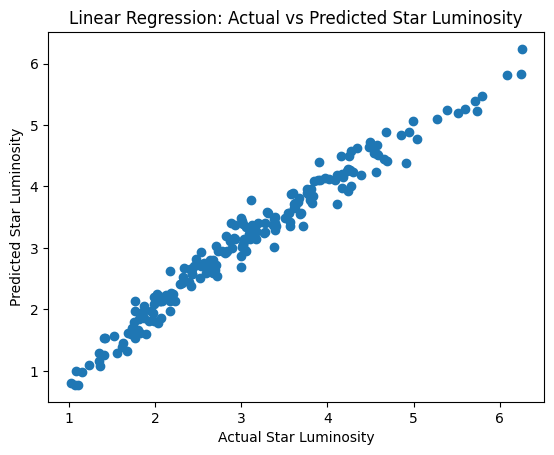

Accuracy: 0.9950738916256158
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       202
        True       0.00      0.00      0.00         1

    accuracy                           1.00       203
   macro avg       0.50      0.50      0.50       203
weighted avg       0.99      1.00      0.99       203



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = data.drop(['star_luminosity'], axis=1)
y = data['star_luminosity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

plt.scatter(y_test, predictions)
plt.xlabel('Actual Star Luminosity')
plt.ylabel('Predicted Star Luminosity')
plt.title('Linear Regression: Actual vs Predicted Star Luminosity')
plt.show()

X_classification = data.drop(['is_habitable'], axis=1)
y_classification = data['is_habitable']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

model_cls = LogisticRegression(max_iter=1000)
model_cls.fit(X_train_cls_scaled, y_train_cls)

predictions_cls = model_cls.predict(X_test_cls_scaled)
accuracy_cls = accuracy_score(y_test_cls, predictions_cls)

print("Accuracy:", accuracy_cls)
print("Classification Report:\n", classification_report(y_test_cls, predictions_cls))

oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_classification, y_classification)
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


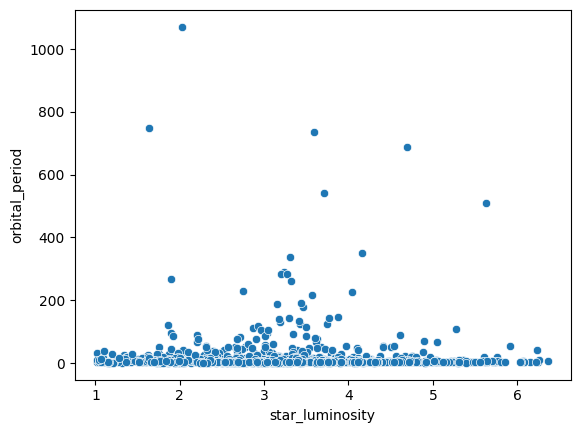

In [ ]:
sns.scatterplot(x='star_luminosity', y='orbital_period', data=data)
plt.show()